In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import xfirst.data.conex as conex
import xfirst.profile_functions as profile_functions

Welcome to JupyROOT 6.28/04


### Settings

In [2]:
conex_files = 'data/conex/p_17-20eV_60deg/sibyll23d/*.root'
branches = ['Xdep', 'Edep']
nfits = 100000
nrows_plt = 3
ncols_plt = 4

fcn = profile_functions.usp()

### Read some profiles, fit them, then draw

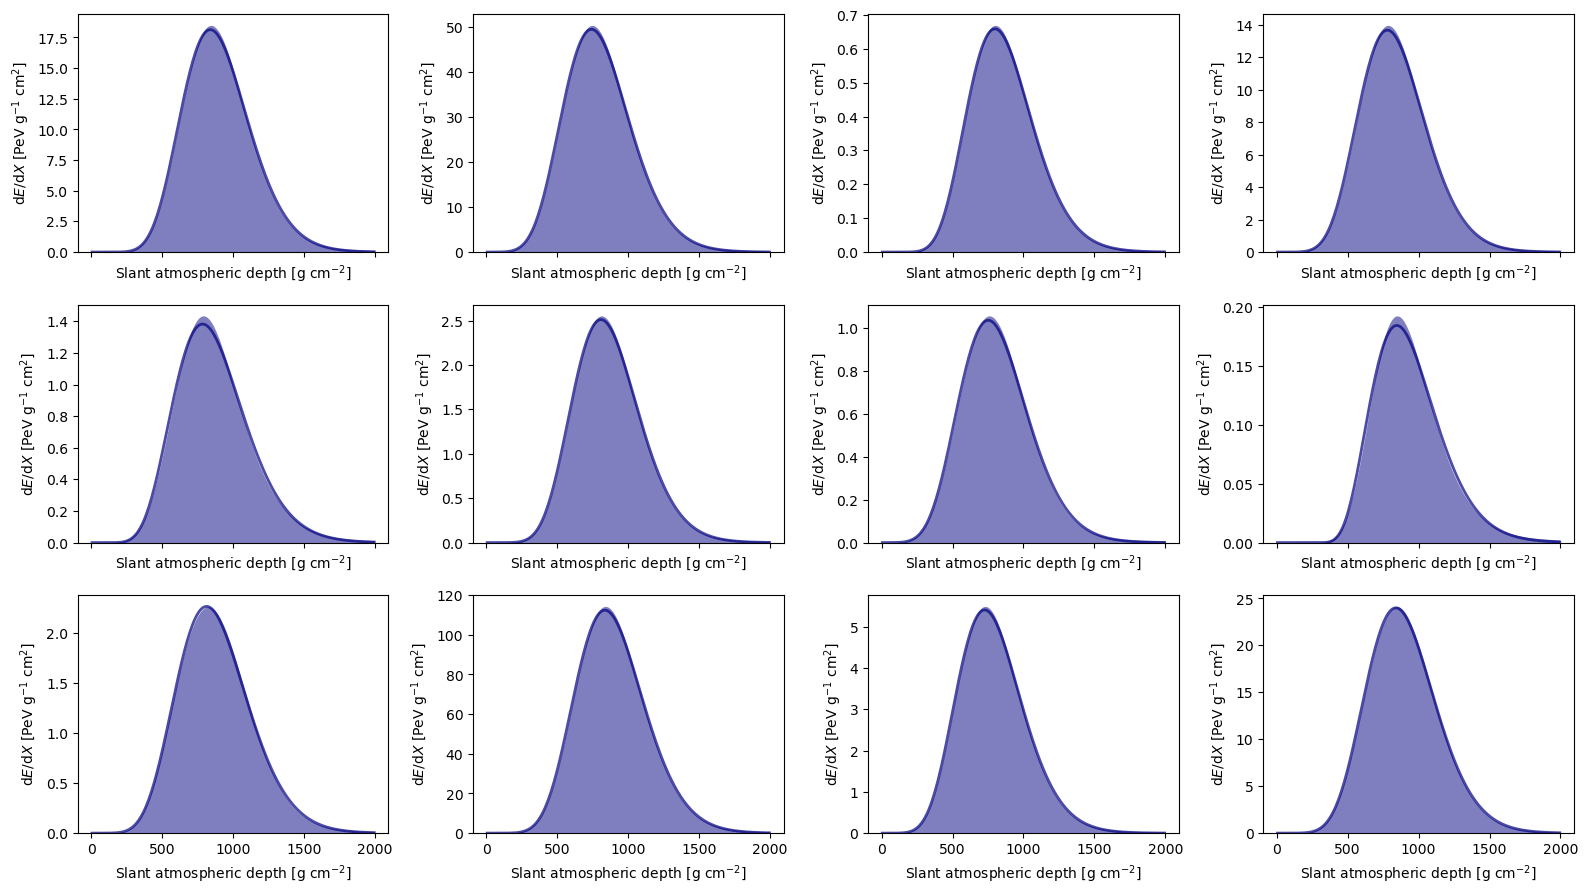

In [3]:
fig, axes = plt.subplots(nrows_plt, ncols_plt, sharex = 'all', sharey = False, figsize = (16, 9))
parser = conex.parser(conex_files, branches, nshowers = nrows_plt*ncols_plt, concat = False)

for (x, y), ax in zip(parser, axes.flatten()):
  fcn.fit(x, y, concat = False)
  fcn.draw(axis = ax)

fig.tight_layout()

### Fit showers and put into a table

In [5]:
parser = conex.parser(conex_files, branches, nfits)
fits = fcn.get_fits(parser, format = 'pd')
fits

,lgNmax,Xmax,L,R,e_lgNmax,e_Xmax,e_L,e_R,status,chi2,ndf
id,,,,,,,,,,,
0,16.713449,838.887024,235.190430,0.264638,0.004542,1.398955,0.634623,0.005031,1.0,26.002298,196.0
1,17.718891,740.304565,235.520477,0.262065,0.004850,1.499637,0.676677,0.005367,1.0,29.713039,196.0
2,13.398415,798.597595,228.261200,0.285932,0.004205,1.240836,0.567233,0.004524,1.0,22.386255,196.0
3,16.429892,779.688293,232.823959,0.250726,0.005047,1.501168,0.696669,0.005348,1.0,32.111366,196.0
4,14.139462,784.245056,247.619705,0.329366,0.005124,1.665134,0.763938,0.005892,1.0,32.645035,196.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,15.086043,805.033875,229.850479,0.211094,0.004006,1.136436,0.539704,0.003877,1.0,20.479839,196.0
99996,17.692612,759.244873,238.256699,0.242737,0.003779,1.167280,0.528989,0.004013,1.0,18.210171,196.0
99997,18.245939,879.643799,247.295517,0.229750,0.003468,1.051619,0.506401,0.003363,1.0,15.266242,196.0


### Draw parameter distributions

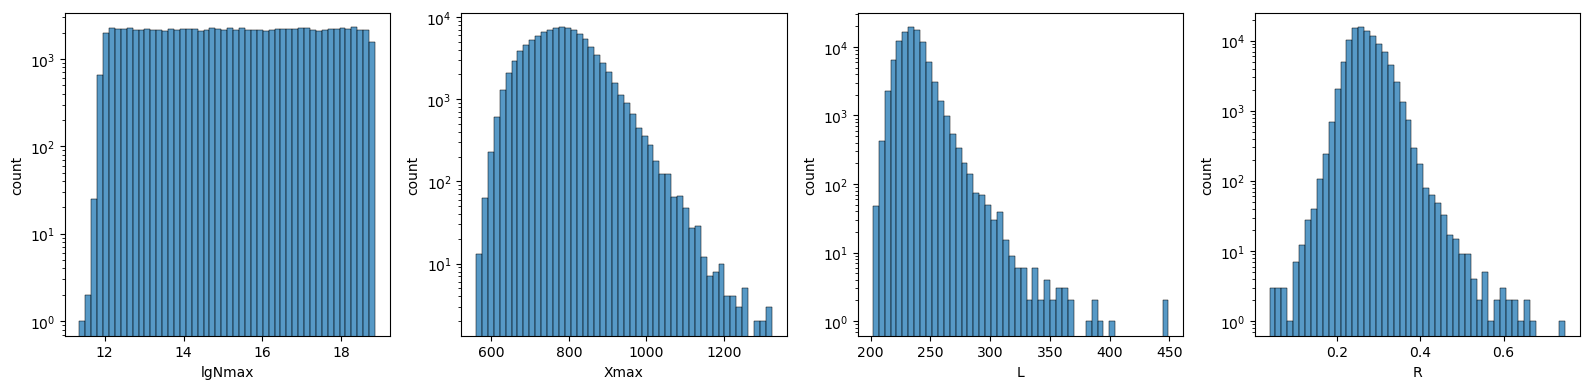

In [6]:
fig, axes = plt.subplots(1, fcn.npar, sharex = False, sharey = False, figsize = (16, 4))

mask = fits.loc[:, 'status'] > 0.99
good_fits = fits.loc[mask]

for param, ax in zip(fcn.parameter_names, axes.flatten()):
  sns.histplot(good_fits, x = param, bins = 50, ax = ax, log = True)
  ax.set_xlabel(param)
  ax.set_ylabel('count')

fig.tight_layout()